#  Customer Churn Prediction using Machine Learning

In today's highly competitive subscription-based service industry, retaining customers is often more cost-effective than acquiring new ones. Understanding why customers leave — and predicting *who* is likely to churn — has become a key priority for businesses aiming to improve customer retention.

This project explores a real-world dataset from a telecommunications company to build a machine learning model capable of predicting customer churn. By analyzing both service usage data and customer demographics, the goal is to identify clients who are at risk of canceling their service.

A high recall score is prioritized in this solution, in order to minimize false negatives — that is, to avoid missing clients who are likely to leave. The final result includes a well-documented machine learning pipeline and a custom decision threshold tailored for business intervention.


## 🎯 Objectives

This project aims to:

- Analyze a real-world telecommunications dataset to understand customer churn behavior.
- Perform thorough data cleaning and exploratory data analysis (EDA).
- Apply feature engineering and proper encoding of categorical variables.
- Build a classification model capable of predicting churn with a focus on recall.
- Optimize the model using techniques like threshold tuning and cross-validation.
- Create a clean and reusable machine learning pipeline for deployment.
- Generate meaningful evaluation metrics, including confusion matrix, classification report, and recall analysis.

---
##  Table of Contents

1. Data Loading
2. Data Cleaning and Wrangling
3. Exploratory Data Analysis (EDA) 
4. Data Processing 
5. Model Training and Evaluation
6. Threshold Tuning
7. Final Pipeline Implementation

---


## 1. Data Loading 📂




Import Libraries:

In [82]:
# For data manipulation and tabular data analysis:
import pandas as pd 
# For efficient numerical computations and array operations:
import numpy as py 
# For data visualization and exploratory analysis through plots and graphs:
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


We begin by importing the dataset into a Pandas DataFrame to explore its structure and contents. The initial inspection helps identify the format, shape, and any potential issues such as missing values or incorrect data types.

In [85]:
df=pd.read_csv('C:/Users/CJB2/Downloads/Telco_Customer_Churn.csv')


In [87]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


***Data Loading completed*** ✅

## 2. Data Cleaning and Wrangling 🧹

In this section, we inspect the dataset to identify issues that could affect modeling, such as incorrect data types or formatting inconsistencies. We use `.info()` and `.describe()` to examine the structure of the dataset and detect incorrect types or non-numeric values.


#### Overview
Using `.info()`, we confirm that there are no missing values in any of the columns — a helpful advantage that reduces the need for imputation. 

However, many columns are currently stored as `object` types, including categorical variables like `gender`, `Partner`, and `PhoneService`, as well as the `TotalCharges` column which should be numeric.


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Summary Statistics
Using `.describe()`, we get a statistical overview of the numeric columns. No obvious anomalies were detected in `tenure` or `MonthlyCharges`, and the `SeniorCitizen` column is already encoded as 0 and 1.

While not directly actionable, this step serves as a sanity check to confirm the numeric features are within expected ranges.

In [95]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Converting Categorical Columns

Several columns in the dataset represent categorical information with only a few possible values (such as `Yes`/`No`). These are currently stored as `object` types, which are not efficient for modeling.

We begin by converting the target column `Churn` into the `category` data type: 

In [98]:
df['Churn']=df['Churn'].astype('category')

Next, we loop through selected categorical features and convert each of them as well:

In [101]:
cat_col=['gender', 'Dependents', 'Partner', 'PhoneService', 'PaperlessBilling']

for col in cat_col:
    df[col]= df[col].astype('category')

### Converting Numerical Columns


We initially attempted to convert the `TotalCharges` column to `float`, but encountered a `ValueError` due to some cells containing empty strings (`''`), which are not valid numbers.

```python
# This line raised: ValueError: could not convert string to float: ''
df['TotalCharges'].astype('float64')


To fix this, we used `pd.to_numeric()` with `errors='coerce'` to convert invalid entries into NaN, and then filled those values with the column's median:


In [106]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'], errors='coerce')


We have now to find the missing values in the `TotalCharges` column after coercing invalid entries. 

Those are going to be replaced by the median values to maintain a realistic distribution while avoiding distortion caused by outliers:

In [109]:
df['TotalCharges'].isnull().sum()

11

In [111]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())



### Final Data Overview

After completing the data cleaning and type conversion steps, we perform a final inspection using `.info()` to confirm that the dataset is ready for analysis.

- All columns now have the correct data types.
- No missing values remain in the dataset.
- Categorical columns have been explicitly cast to `category` to optimize memory and improve modeling performance.

The dataset is now fully prepared for Exploratory Data Analysis (EDA).


In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

*The dataset is now fully prepared for Exploratory Data Analysis (EDA).*

***Data Cleaning and Wrangling completed*** ✅

## 3. Exploratory Data Analysis 📊

In this section, we explored the dataset to uncover patterns, relationships, and potential issues that could affect model performance. We focused on visualizing both categorical and numerical features in relation to the target variable `Churn`, with the goal of identifying which features are most relevant for prediction. Additionally, we examined the distribution of the target label to check for class imbalance, which could impact the effectiveness of classification models.

#### Categorical Feature Exploration

We generated countplots for all categorical variables against the target label `Churn` to visually assess the strength of their relationships.

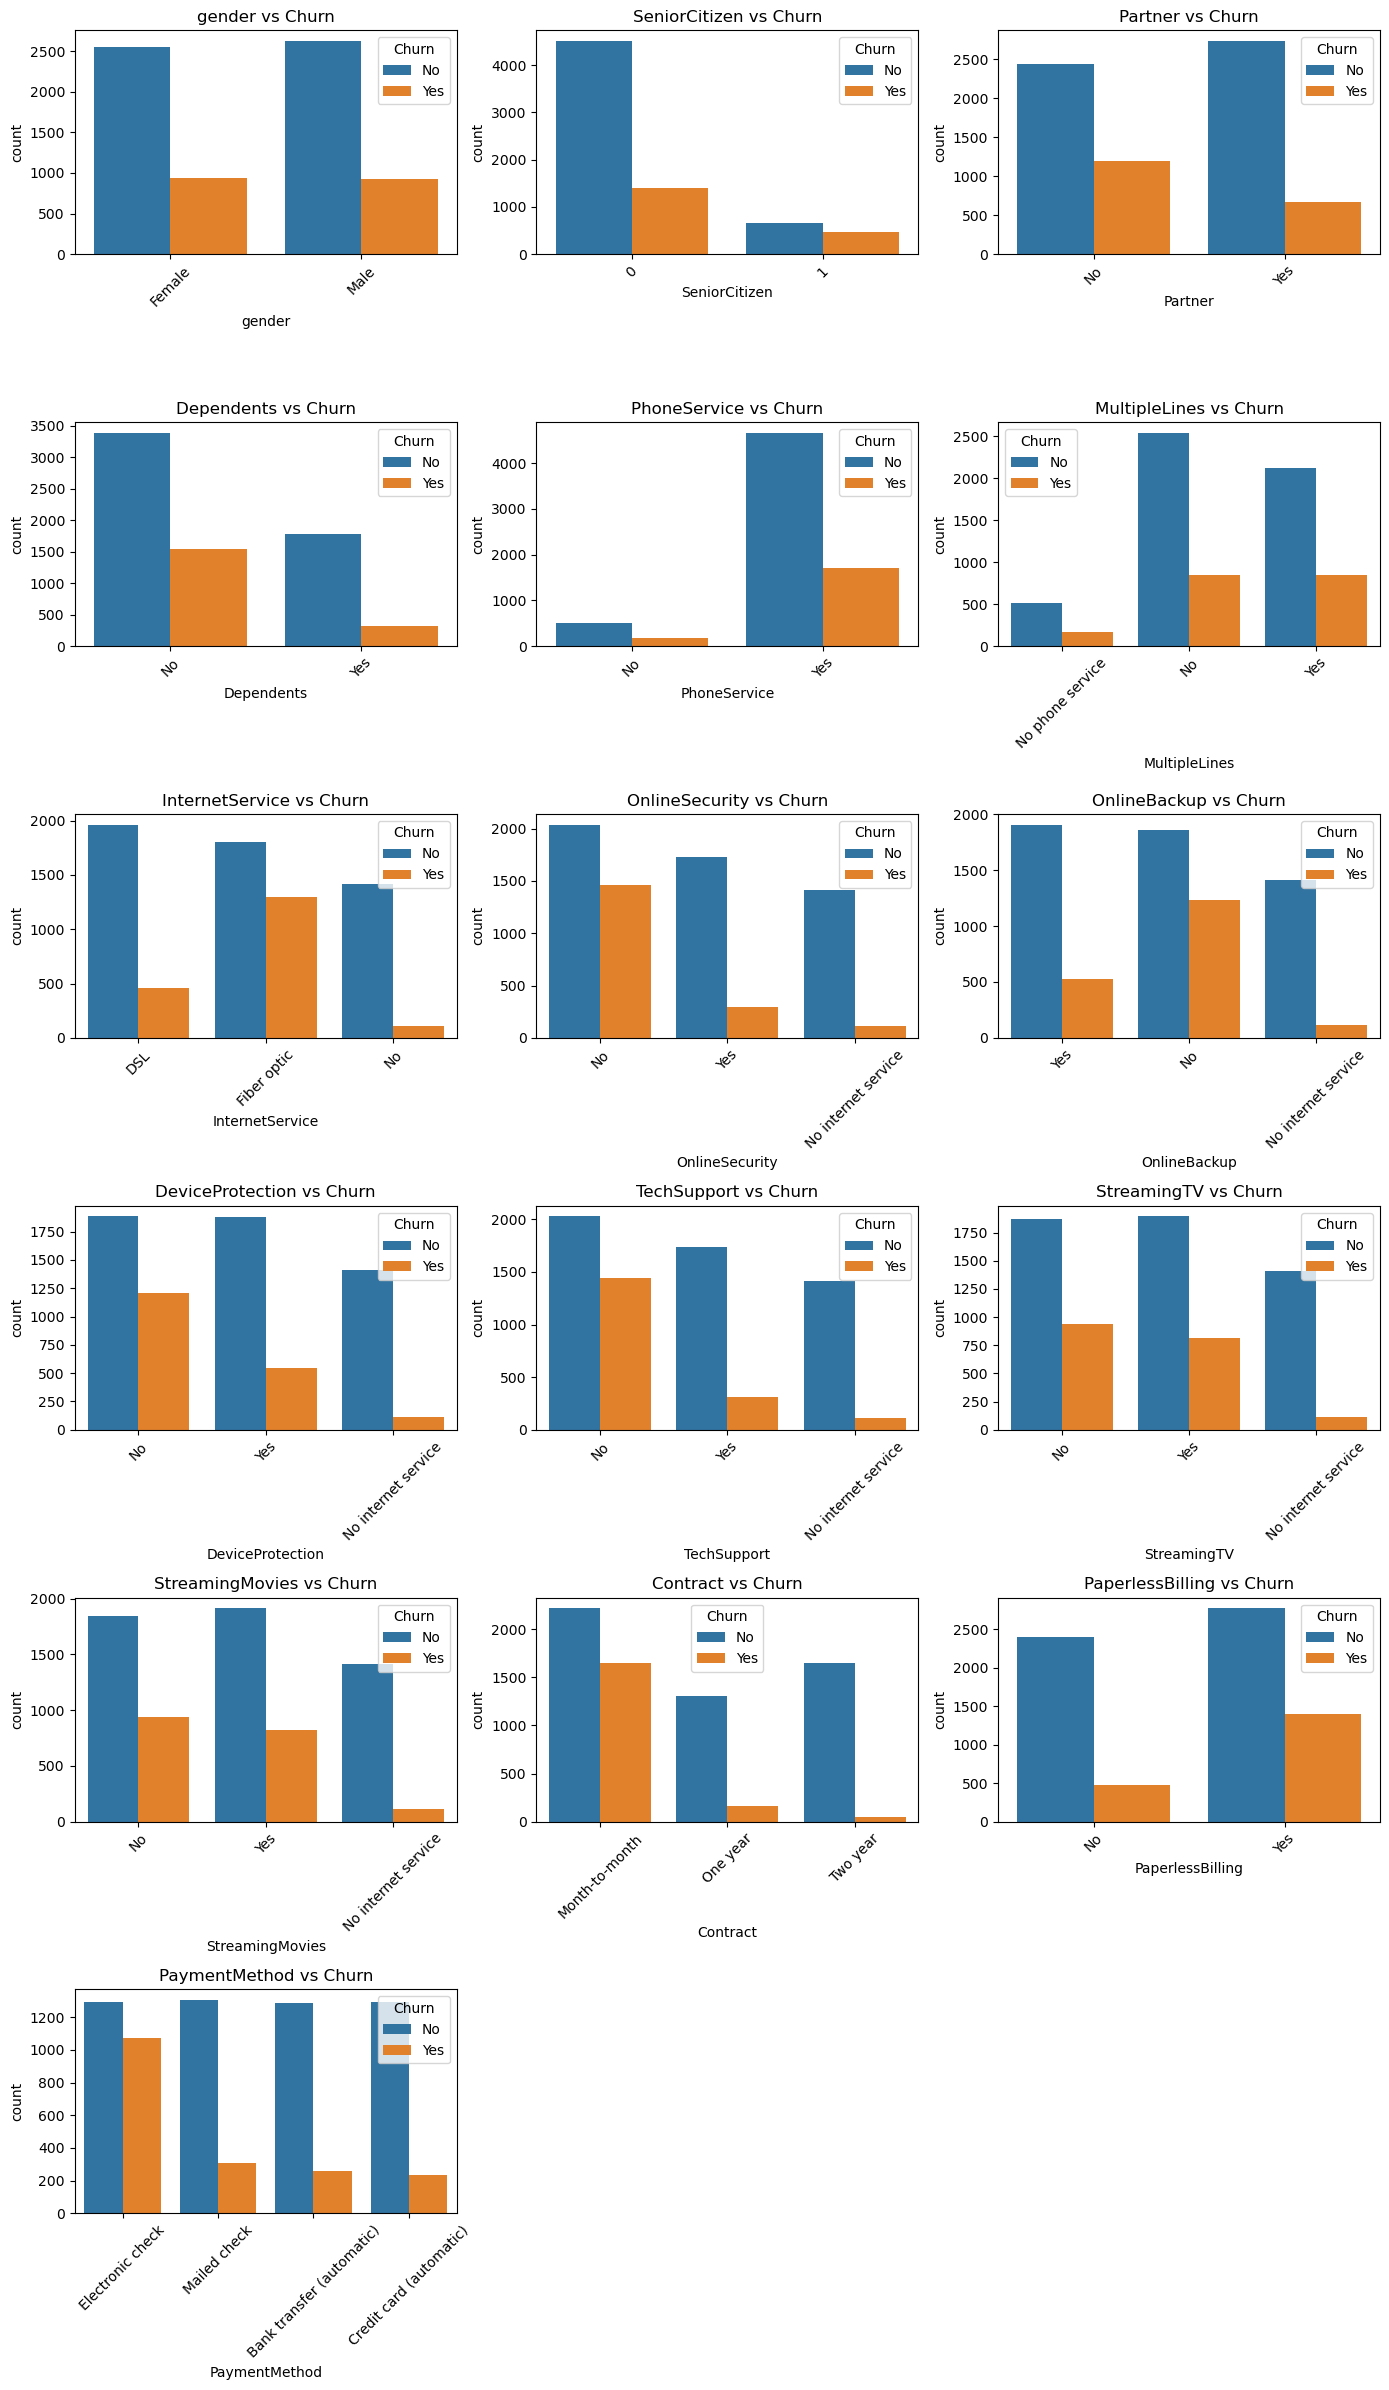

In [120]:
categoric = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
               'PhoneService', 'MultipleLines', 'InternetService',
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
               'TechSupport', 'StreamingTV', 'StreamingMovies',
               'Contract', 'PaperlessBilling', 'PaymentMethod']

cols = 3
n = len(categoric)

plt.figure(figsize=(14, 4 * (n // cols + 1)))

for i, col in enumerate(categoric):
    plt.subplot(n // cols + 1, cols, i + 1)
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


The feature `gender` exhibits virtually **no variation in churn rates** between male and female customers. This lack of contrast indicates that `gender` is unlikely to contribute meaningful predictive power and will therefore be **excluded** from the modeling process.  🧾  




Aside it, most of the remaining categorical features show a **clear visual separation** between customers who churned and those who did not. This indicates that these variables likely contain **predictive patterns** relevant to churn behavior. Therefore, they are considered strong candidates to be included as input features during the modeling phase.  🧾  


#### Numerical Feature explorations

Boxplots were used to explore how each numerical variable relates to the target label Churn, highlighting differences in distribution across churn outcomes.




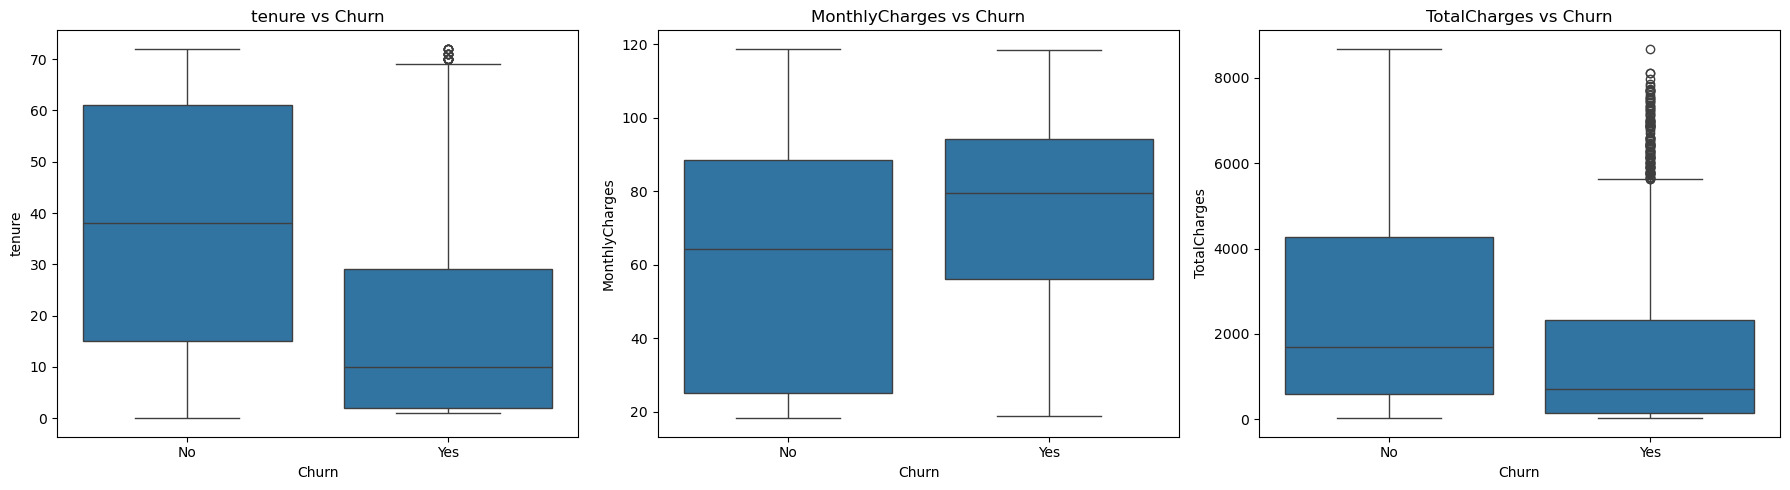

In [126]:
numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']
cols = len(numeric)

plt.figure(figsize=(18, 5))

for i, col in enumerate(numeric):
    plt.subplot(1, cols, i + 1)
    sns.boxplot(data=df, x='Churn', y=col)
    plt.title(f"{col} vs Churn")
    plt.tight_layout()

plt.show()


From the boxplots above, we can draw the following insights:

- **Tenure vs Churn** 📉  
  Customers who churn tend to have **much shorter tenure** (duration of stay) compared to those who remain. The median tenure for churned customers is significantly lower, indicating that early-stage customers are more likely to leave.  
  This feature shows **strong separation** between classes and is likely to be very predictive.

- **MonthlyCharges vs Churn** 📉   
  Churned customers generally have **slightly higher monthly charges**, although there is considerable overlap in distributions. The median is visibly higher, but not drastically so.  
  This variable may contribute **some predictive value**, especially when combined with other features.

- **TotalCharges vs Churn** 📉   
  Unsurprisingly, customers who churn tend to have **lower total charges**, which aligns with shorter tenure. While the median difference is notable, this feature is strongly correlated with tenure and should be monitored for multicollinearity later.  
  It may still be useful when used in interaction with other features.

In summary, **tenure** appears to be the most powerful numerical predictor, while **MonthlyCharges** and **TotalCharges** offer complementary information worth including in the model.


#### Label Distribution

We used a barplot to examine the class balance of our target label

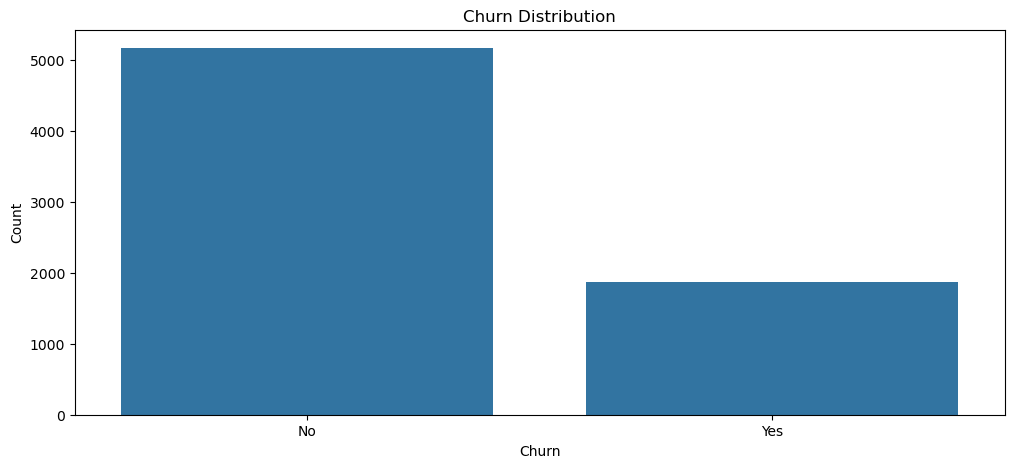

In [130]:
churn_count=df['Churn'].value_counts().reset_index()
churn_count.columns=['Churn','Count']
plt.figure(figsize=(12,5))
sns.barplot(x='Churn',y='Count', data=churn_count)
plt.title('Churn Distribution')
plt.show()

In [132]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

The target variable Churn is significantly imbalanced, with far more *No* entries than *Yes*. This imbalance can negatively affect model performance, especially for recall on the minority class. To address this, resampling techniques such as `SMOTE`, `Random Oversampling`, or `class weighting` will be considered during model preparation.

***Exploratory Data Analysis completed*** ✅

## 4. Data Processing 🛠️
To prepare the dataset for machine learning algorithms, we encoded categorical features into numerical format.

#### Enconding Binary Columns 
For binary features containing only `Yes` or `No` values, we applied a straightforward mapping:

- `Yes` → `1`
- `No` → `0`

In [137]:
cat_encoding = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']

for col in cat_encoding:
    df[col] = df[col].str.strip().str.title() 
    df[col] = df[col].map({'Yes': 1, 'No': 0})


#### Enconding Nominal Categorical Features
For nominal features with multiple non-ordinal categories (e.g., contract types, payment methods), we used one-hot encoding via `pd.get_dummies()` with `drop_first=True` to avoid multicollinearity.

This technique created new binary columns for each category, allowing the model to handle them effectively without introducing redundant information.

In [140]:
enconding_=['InternetService','Contract','PaymentMethod','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

df=pd.get_dummies(df, columns=enconding_, drop_first=True)

We then check the columns available in our DataFrame due to addition of new columns from `.get_dummies`:

In [143]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes'],
      dtype='object')


#### Feature Selection and Target Definition

We prepared the feature set `X` and the target variable `y` for model training.

In [146]:
X=df[['SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
       'TotalCharges', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes']]

In [148]:
y=df['Churn']

#### Train & Test Split
To evaluate our model's ability to generalize to unseen data, we split the dataset into training and testing sets using a **80/20 ratio**.
We used `stratify=y` to preserve the original distribution of the target variable (`Churn`) in both sets. This is especially important for imbalanced datasets to ensure fair performance metrics.

In [151]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

***Data Processing completed*** ✅

## 5. Model Training and Evaluation 🖥️

In this section, we train and evaluate different classification models to predict customer churn.

Given the business goal of identifying customers at risk of leaving, we place particular emphasis on optimizing **recall** for the positive class (`Churn = Yes`). This is because **false negatives** — failing to identify a customer who will churn — are more costly than false positives, as they represent missed opportunities for retention.

We'll evaluate each model using metrics such as accuracy, precision, recall, F1-score, and the confusion matrix, but our primary focus will remain on improving recall without severely compromising model stability.


### Logistic Regression

We initialized the Logistic Regression model with `class_weight='balanced'` to account for the class imbalance in our target variable. Then, we fitted the model to the training data (already scaled).


In [156]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, recall_score

# To prepare the data for Logistic Regression, we standardized the features using `StandardScaler`, as this model performs better when input features have a similar scale:

scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

LR=LogisticRegression(class_weight='balanced', random_state=42)
LR.fit(X_train_scaled, y_train)



LogisticRegression(class_weight='balanced', random_state=42)

After training the model, we generated predictions on the test set to evaluate its performance:


In [159]:
y_pred=LR.predict(X_test_scaled)

To assess whether the model is underfitting or overfitting, we compared accuracy on both training and test sets:

In [162]:
train_acc = LR.score(X_train_scaled, y_train)
test_acc = LR.score(X_test_scaled, y_test)

print(f"Accuracy (train): {train_acc:.2f}")
print(f"Accuracy (test):  {test_acc:.2f}")


Accuracy (train): 0.75
Accuracy (test):  0.74


*The accuracy scores for training (0.75) and testing (0.74) are very close, which suggests that the model is neither overfitting nor underfitting. This balance indicates good generalization capability.*


After that we evaluated model performance using **precision**, **recall**, and **F1-score**, and also inspected the **confusion matrix** to better understand the distribution of predictions:

In [166]:
print("Classification Report - LR:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report - LR:

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.50      0.78      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409


Confusion Matrix:
[[747 288]
 [ 81 293]]


The classification report shows a recall of **0.78** for the `Churn = 1` class, which is a strong result considering the class imbalance. Precision for this class is lower (0.50), meaning the model identifies most churn cases but also produces some false positives.

The confusion matrix confirms this pattern:
- 293 churn cases were correctly identified (true positives).
- 81 were missed (false negatives).
- 288 non-churn customers were wrongly classified as churn (false positives).

This trade-off is acceptable when prioritizing recall.

#### **We'll now experiment with multiple classification algorithms**, including:

- Random Forest  
- K-Nearest Neighbors (KNN)  
- SVM 
- XGBoost
- Decision Tree   

Each model will be trained and evaluated using the same data splits and metrics.   
We would like to reach at least 83% of recall, as such, after testing all candidates, we'll compare their results — focusing primarily on **recall for the positive class (Churn = Yes)** — and select the most suitable model for deployment.


### Random Forest

In [171]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier(class_weight='balanced', random_state=42)
RF.fit(X_train, y_train)



RandomForestClassifier(class_weight='balanced', random_state=42)

In [172]:
y_pred_rf=RF.predict(X_test)

In [175]:
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409

[[925 110]
 [195 179]]


### KNN

In [178]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=5)  # Você pode testar outros valores depois
knn.fit(X_train_scaled, y_train)


y_pred_knn = knn.predict(X_test_scaled)


print("Classification Report - KNN:\n")
print(classification_report(y_test, y_pred_knn))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))



Classification Report - KNN:

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1035
           1       0.54      0.49      0.51       374

    accuracy                           0.75      1409
   macro avg       0.68      0.67      0.67      1409
weighted avg       0.75      0.75      0.75      1409


Confusion Matrix:
[[878 157]
 [190 184]]


### SVM

In [181]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', class_weight='balanced', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)

y_pred_svm = svm.predict(X_test_scaled)

print("Classification Report - SVM:\n")
print(classification_report(y_test, y_pred_svm))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))



Classification Report - SVM:

              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1035
           1       0.51      0.77      0.62       374

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.80      0.75      0.76      1409


Confusion Matrix:
[[763 272]
 [ 87 287]]


### XGBoost

In [184]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=2.7, eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train)

y_pred_xgb = xgb.predict(X_test_scaled)

print("Classification Report - XGBoost (scaled):\n")
print(classification_report(y_test, y_pred_xgb))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))



Classification Report - XGBoost (scaled):

              precision    recall  f1-score   support

           0       0.87      0.78      0.83      1035
           1       0.53      0.69      0.60       374

    accuracy                           0.76      1409
   macro avg       0.70      0.73      0.71      1409
weighted avg       0.78      0.76      0.77      1409

Confusion Matrix:
[[809 226]
 [117 257]]


### DecisionTree

In [187]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Classification Report - Decision Tree:\n")
print(classification_report(y_test, y_pred_dt))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))



Classification Report - Decision Tree:

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1035
           1       0.49      0.49      0.49       374

    accuracy                           0.73      1409
   macro avg       0.66      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409

Confusion Matrix:
[[848 187]
 [191 183]]


### Results


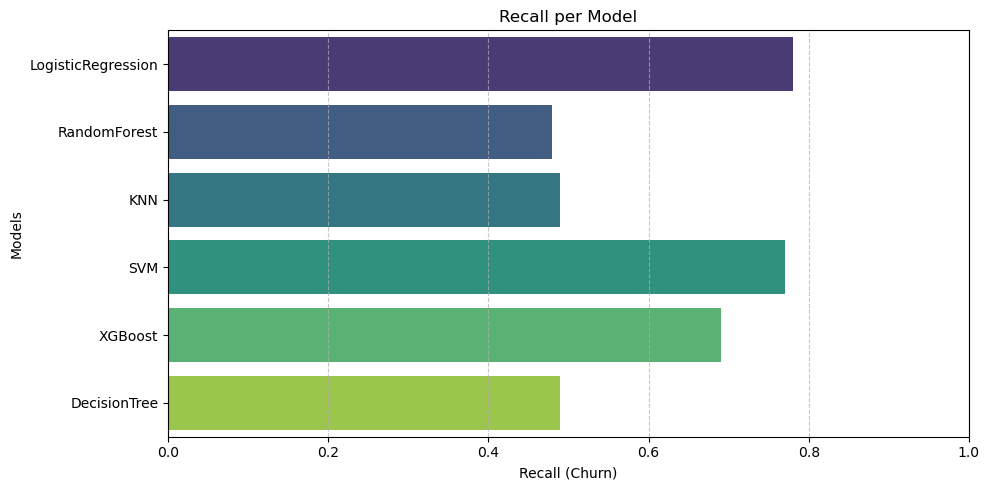

In [190]:

data = {
    'Model': ['LogisticRegression', 'RandomForest', 'KNN', 'SVM', 'XGBoost', 'DecisionTree'],
    'Recall (Churn)': [0.78, 0.48, 0.49, 0.77, 0.69, 0.49]
}

df_summary = pd.DataFrame(data)

plt.figure(figsize=(10, 5))
sns.barplot(x='Recall (Churn)', y='Model', data=df_summary, palette='viridis')

plt.title('Recall per Model')
plt.xlabel('Recall (Churn)')
plt.ylabel('Models')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Above we have the Recall (Churn) results of each model.**

---

### Final Model Selection and Conclusion

After evaluating all classification algorithms and due to its simpler implementation, **Logistic Regression** was chosen over **Support Vector Machine (SVM)** as the final model for deployment.

This decision was based on the following considerations:

- **High Recall for the Positive Class (Churn = Yes):**  
  Logistic Regression achieved a recall of **0.78**, which is the highest among all tested models. Since the primary goal is to **minimize false negatives** (i.e., failing to identify customers likely to churn), this metric was critical.

- **Balanced Performance Across Metrics:**  
  Although its precision was lower than some other models, its **F1-score** for the positive class remained competitive, demonstrating a good trade-off between precision and recall.

- **No Overfitting Observed:**  
  The training and test accuracies (0.75 and 0.74 respectively) were very close, suggesting that the model generalizes well and is neither overfitting nor underfitting.


📌 Although we are not yet satisfied with the results, based on these strengths, **Logistic Regression** offers the best balance of performance, stability, and interpretability — making it the preferred choice for this customer churn prediction task.


***Model Training and Evaluation completed*** ✅

## 6. Threshold Tuning 🔬

The **Logistic Regression** model delivered strong performance — especially in terms of **recall**. However, our business objective is to catch as many potential churners as possible. Even small improvements in recall can lead to more effective retention strategies.

  **Why adjust the threshold?**

By default, models classify samples as "churn" or "not churn" using a **0.5 probability cutoff**. This threshold isn't always ideal — especially when:

- False Negatives (missed churns) are costly,
- The label is imbalanced,
- Or when **recall is more valuable** than precision.

💡 To optimize recall, we will:

- Evaluate multiple threshold values to find a better balance,
- Select a **custom threshold** that improves recall while maintaining acceptable precision,
- Apply the new threshold and assess results via confusion matrix and classification metrics.

To better understand how confident our model is when predicting churn, we plotted the probability scores for the positive class (`churn = 1`) generated by `predict_proba`: 



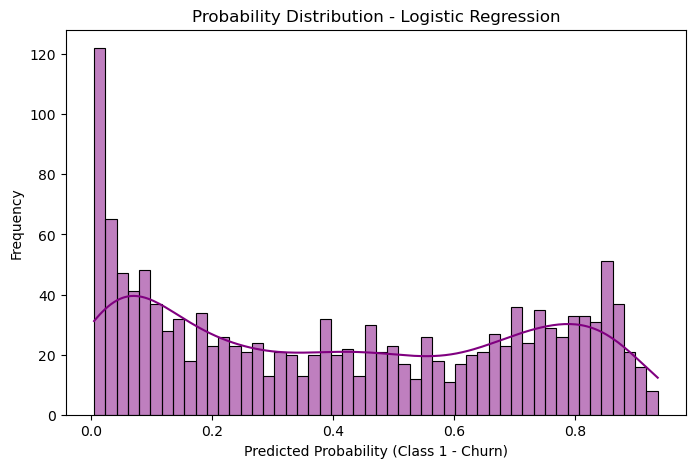

In [195]:
# We'll use this histoplot to choose a threshold that favors recall, our primary metric.
y_scores = LR.predict_proba(X_test_scaled)[:, 1]

plt.figure(figsize=(8, 5))
sns.histplot(y_scores, bins=50, kde=True, color='purple')
plt.xlabel('Predicted Probability (Class 1 - Churn)')
plt.ylabel('Frequency')
plt.title('Probability Distribution - Logistic Regression')
plt.show()


### Evaluating Model Performance with Custom Threshold

After analyzing the probability distribution, we adjusted the classification threshold from the default `0.50` to `0.40`.

Below, we generate the classification report and confusion matrix using this new threshold to evaluate the trade-off between recall and precision:


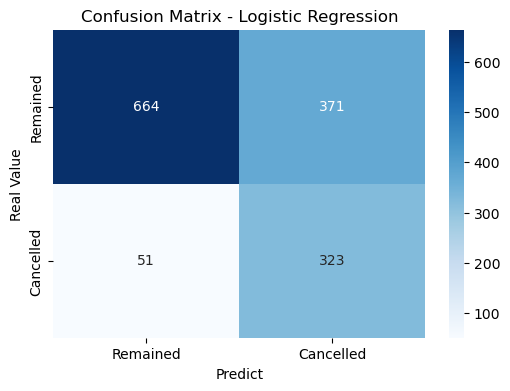


Recall (Churn = 1): 0.86


In [198]:
# New threshold:
y_scores = LR.predict_proba(X_test_scaled)[:, 1]
y_pred_custom = (y_scores >= 0.40).astype(int)


cm = confusion_matrix(y_test, y_pred_custom)

# Confusion_Matrix Plot:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Remained', 'Cancelled'], yticklabels=['Remained', 'Cancelled'])
plt.xlabel('Predict')
plt.ylabel('Real Value')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

recall_custom = recall_score(y_test, y_pred_custom, pos_label=1)
print(f"\nRecall (Churn = 1): {recall_custom:.2f}")

### Final Results and Business Conclusion

By adjusting the decision threshold to `0.40`, we achieved a **recall of 0.86** for the `churn = 1` class — a significant improvement from the initial 0.78. This means that **86% of customers likely to churn are now correctly identified**, allowing the business to proactively take action before losing them.

Although this adjustment caused a slight drop in precision (from 0.50 to 0.47), the trade-off is intentional and acceptable. Prioritizing **recall** ensures we **minimize false negatives**, which in our context represents customers who were about to leave but went undetected.

Had the precision dropped too far, we might have faced a situation where too many customers are incorrectly flagged as likely to churn, potentially **overwhelming our retention teams** or even **annoying satisfied customers** with unnecessary contact — and ironically encouraging churn. But that's not the case here.

With only a **3% drop in precision**, our model maintains a healthy balance:  
- We catch more customers at risk,  
- Without creating operational noise or harming customer trust.

This makes **Logistic Regression** — with a calibrated threshold — a practical, trustworthy, and deployable solution for churn intervention strategies.


***Threshold Tuning completed*** ✅

## 7. Final Pipeline Implementation 📦

To streamline preprocessing and model training, we built a final `Pipeline` combining `StandardScaler` and `LogisticRegression`. This ensures that all transformations are consistently applied and simplifies future deployment.

We also applied a custom classification threshold of **0.40**, previously identified as optimal to maximize **recall** while keeping **precision** at acceptable levels.

In [202]:
from sklearn.pipeline import Pipeline


pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])


In [204]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    random_state=42))])

In [ ]:
# Probability of class 1 (churn)
y_scores = pipeline.predict_proba(X_test)[:, 1]

# Custom Threshold
threshold = 0.40
y_pred_custom = (y_scores >= threshold).astype(int)

cm = confusion_matrix(y_test, y_pred_custom)

# Confusion_Matrix Plot:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Remained', 'Cancelled'], yticklabels=['Remained', 'Cancelled'])
plt.xlabel('Predict')
plt.ylabel('Real Value')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

recall_custom = recall_score(y_test, y_pred_custom, pos_label=1)
print(f"\nRecall (Churn = 1): {recall_custom:.2f}")



Above is the final performance of the pipeline:
- **Recall (class 1 - churn):** 86%
- **Precision (class 1 - churn):** 47%
- **Accuracy:** 70%

These results confirm that our model is effectively identifying churn cases, with a strong recall and balanced trade-off in other metrics.


***Final Pipeline Implementation completed*** ✅

## Authors

Júlio Silva